In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# Load CSVs
X = pd.read_csv(r"C:\Users\KIIT\Documents\ML\logisticX (1) - logisticX (1).csv", header=None).values
Y = pd.read_csv(r"C:\Users\KIIT\Documents\ML\logisticY - logisticY.csv", header=None).values

In [171]:
# Normalize X
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = ((X - X_mean) / X_std).T
Y = Y.T

In [173]:
# Split manually
def train_test_split_manual(X, Y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    m = X.shape[1]
    indices = np.random.permutation(m)
    test_count = int(m * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[:, train_idx], X[:, test_idx], Y[:, train_idx], Y[:, test_idx]

x_train, x_test, y_train, y_test = train_test_split_manual(X_norm, Y, 0.2, 42)



In [175]:
# Core Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [177]:
def initialize_weights_and_bias(dim):
    return np.zeros((dim, 1)), 0

In [179]:
def compute_cost_and_gradient(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    return cost, dw, db


In [181]:
def optimize(w, b, X, Y, learning_rate, num_iterations):
    cost_list = []
    for _ in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(w, b, X, Y)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost_list.append(cost)
    return {"w": w, "b": b}, cost_list

In [183]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)

# Train model (learning rate 0.1)
w, b = initialize_weights_and_bias(x_train.shape[0])
params_01, cost_01 = optimize(w, b, x_train, y_train, 0.1, 1000)
y_pred_train_01 = predict(params_01["w"], params_01["b"], x_train)
print("Final cost (LR=0.1):", cost_01[-1])
print("Final weights:", params_01["w"].flatten())
print("Final bias:", params_01["b"])


Final cost (LR=0.1): 0.23783870168135762
Final weights: [ 2.33420931 -2.37064667]
Final bias: 0.6443377550535705


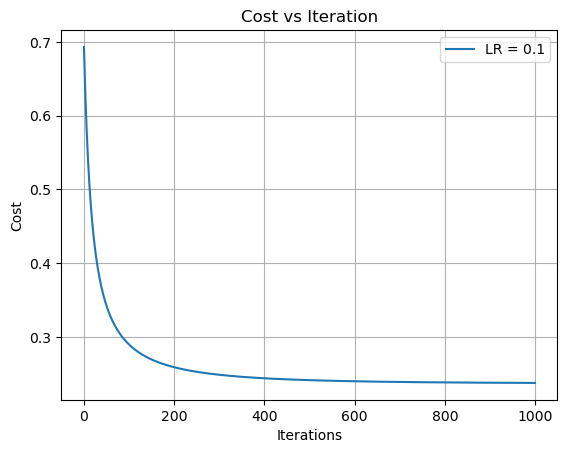

In [185]:
plt.plot(range(len(cost_01)), cost_01, label='LR = 0.1')
plt.title("Cost vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


In [187]:
# Train another model for LR = 5
w, b = initialize_weights_and_bias(x_train.shape[0])
params_05, cost_05 = optimize(w, b, x_train, y_train, 5, 100)

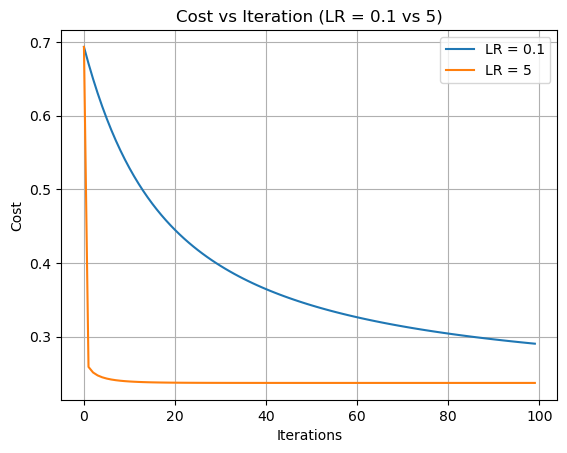

In [189]:
# Compare both cost curves
plt.plot(range(100), cost_01[:100], label='LR = 0.1')
plt.plot(range(100), cost_05, label='LR = 5')
plt.title("Cost vs Iteration (LR = 0.1 vs 5)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


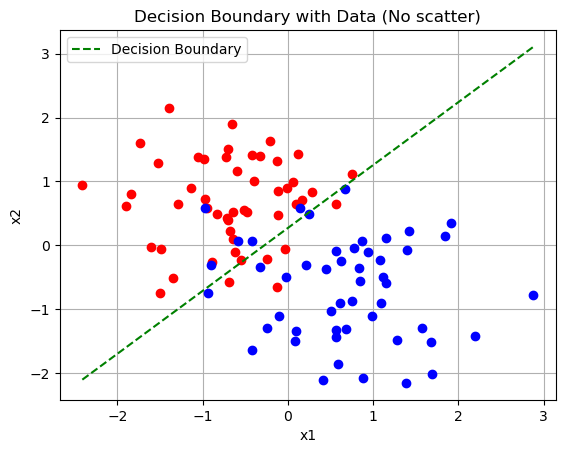

In [191]:
# Plot data and decision boundary (no scatter)
x1 = X_norm[0, :]
x2 = X_norm[1, :]
colors = ['red' if y == 0 else 'blue' for y in Y.flatten()]

for xi1, xi2, color in zip(x1, x2, colors):
    plt.plot(xi1, xi2, marker='o', color=color)
     #Decision boundary: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
w = params_01["w"]
b = params_01["b"]
x_vals = np.linspace(min(x1), max(x1), 100)
y_vals = -(w[0]*x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'g--', label='Decision Boundary')
plt.title("Decision Boundary with Data (No scatter)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()


In [193]:
# Confusion matrix and metrics
def compute_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return {"TP": TP, "TN": TN, "FP": FP, "FN": FN,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1}

metrics = compute_metrics(y_train, y_pred_train_01)
print("\nConfusion Matrix:")
print(f"TP: {metrics['TP']}, TN: {metrics['TN']}, FP: {metrics['FP']}, FN: {metrics['FN']}")
print("\nMetrics:")
print(f"Accuracy:  {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall:    {metrics['recall']:.4f}")
print(f"F1-Score:  {metrics['f1_score']:.4f}")


Confusion Matrix:
TP: 37, TN: 35, FP: 3, FN: 5

Metrics:
Accuracy:  0.9000
Precision: 0.9250
Recall:    0.8810
F1-Score:  0.9024
